# Analiza rabljenih bark
V tem dokumentu je analiza podatkov rabljenih bark pridobljenih iz [Boat24](https://www.boat24.com/en/), narejena je s pomočjo knjižnice *pandas*, *matplotlib* ter *numpy*. Analizirane so barke na motor, torej ni jadrnic.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

barke = pd.read_csv("podatki_bark.csv", index_col="id")
pd.options.display.max_rows = 20

barke

,ime_barke,tip_barke,cena,dolzina,sirina,letnik,st_kabin,st_ur,drzava
id,,,,,,,,,
1,AZIMUT 46 FLY,Flybridge,NaN,15 €,4 €,2003 €,3 €,930 €,Italy
10,Riviera Marine 51 Flybridge,Flybridge,440000 €,17 €,5 €,2004 €,3 €,1000 €,NaN
100,Pershing 72,Motor Yacht,NaN,22 €,6 €,2007 €,NaN,645 €,Italy
1000,Manò Marine 3850,Cabin Cruiser,135000 €,12 €,4 €,2008 €,3 €,690 €,Italy
1001,Crownline 315 sr,Offshore Boat,72000 €,10 €,3 €,2007 €,2 €,650 €,Italy
...,...,...,...,...,...,...,...,...,...
994,Four Winns Vista 288,Sport Boat,45000 €,8 €,3 €,2008 €,2 €,400 €,Italy
995,Ilver Galaxi 28,Sport Boat,35000 €,9 €,3 €,1995 €,1 €,645 €,Italy
996,FIM REGINA 340 - FUORIBORDO YAMAHA #16,Motor Yacht,340000 €,10 €,3 €,2023 €,1 €,NaN,Italy


Za začetek je tukaj tabela vseh podatkov, ki sem jih zajel v analizi, posamično plovilo predstavlja ena vrstica tabele.

In [22]:
barke.sort_values("cena", ascending=False).head(1)

,ime_barke,tip_barke,cena,dolzina,sirina,letnik,st_kabin,st_ur,drzava
id,,,,,,,,,
631,Mondo marine ALEXANDER AGAIN,Superyacht,17500000.0,49.15,9.0,NaN,6.0,3924.0,Italy


In [21]:
barke.sort_values("cena").head(1)

,ime_barke,tip_barke,cena,dolzina,sirina,letnik,st_kabin,st_ur,drzava
id,,,,,,,,,
1133,Eolo Powercraft Eolo - Tobago,Sport Boat,4500.0,5.3,2.15,1994.0,NaN,NaN,Italy


Tukaj sta kot zanimivost najdražja in najcenejša barka.

<Axes: title={'center': 'Povprečna cena po tipih bark'}, xlabel='Tip barke'>

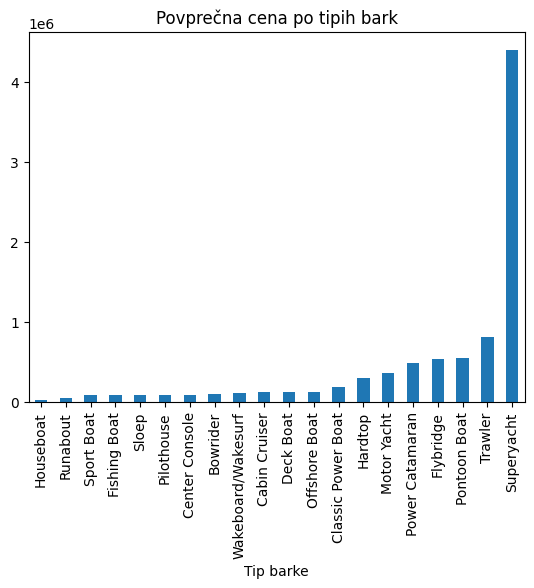

In [32]:
barke.groupby("tip_barke").mean(numeric_only=True).sort_values("cena").cena.plot.bar(title="Povprečna cena po tipih bark", xlabel="Tip barke")

Če gledamo le povprečne cene brez upoštevanja drugih faktorjeu, je očitno da bodo najdražje barke t.i. "Superyacht", ker so daleč največje. Spodaj je enak graf, le brez te kategorije.

<Axes: title={'center': 'Povprečna cena po tipih bark, brez superyacht'}, xlabel='Tip barke'>

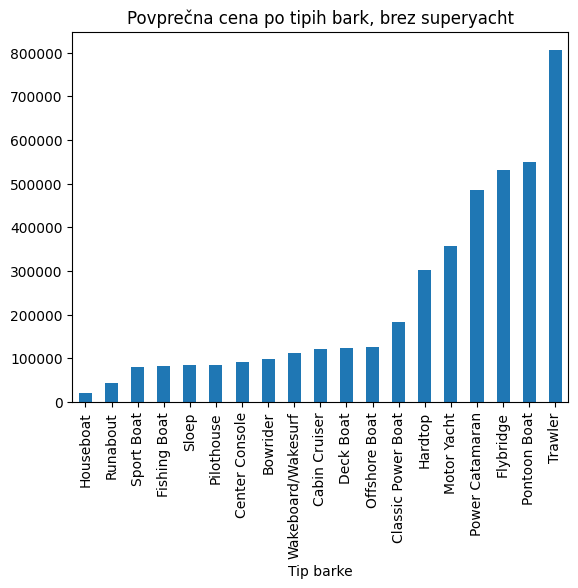

In [33]:
brez_superyacht = barke[barke.tip_barke != "Superyacht"]
brez_superyacht.groupby("tip_barke").mean(numeric_only=True).sort_values("cena").cena.plot.bar(title="Povprečna cena po tipih bark, brez superyacht", xlabel="Tip barke")

C:\Users\Uporabnik\AppData\Local\Temp\ipykernel_19236\2823203178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brez_na.dolzina = brez_na.dolzina.astype(int)


Text(0.5, 1.0, 'Povprečne cene bark po dolžinah')

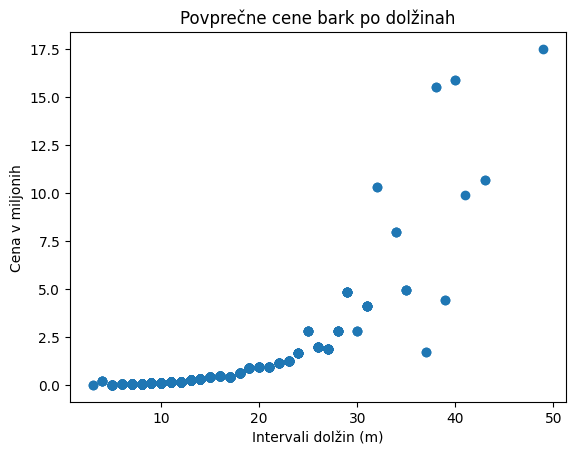

In [4]:
brez_na = barke.dropna(subset=["dolzina"])
brez_na.dolzina = brez_na.dolzina.astype(int)
intervali_dolzin = list(range(brez_na.dolzina.min(), brez_na.dolzina.max() + 2, 1))
brez_na_intervali = pd.cut(brez_na.dolzina, bins=intervali_dolzin, right=False)
brez_na_povprecje = brez_na.groupby(brez_na_intervali).cena.mean(numeric_only=True)
zdruzeno = brez_na.join(brez_na_povprecje, on=brez_na_intervali, rsuffix="_povprecje")

dolzine = zdruzeno.dolzina
cene = zdruzeno.groupby("dolzina").cena_povprecje.transform("first") / 10**6

plt.scatter(dolzine, cene)
plt.xlabel("Intervali dolžin (m)")
plt.ylabel("Cena v miljonih")
plt.title("Povprečne cene bark po dolžinah")

C:\Users\naber\AppData\Local\Temp\ipykernel_14364\2068597002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brez_na.dolzina = brez_na.dolzina.astype(int)


Text(0.5, 1.0, 'Povprečne cene bark po dolžinah do 25m')

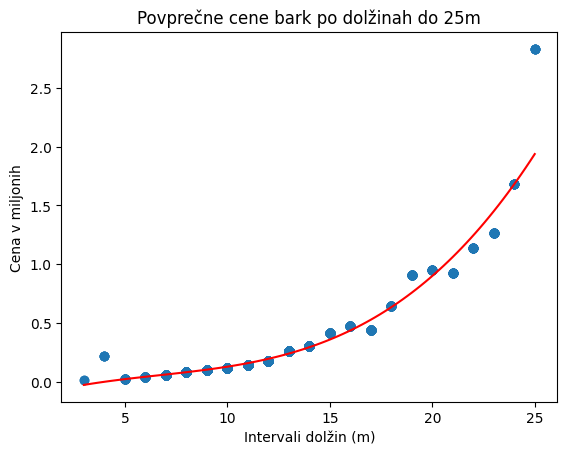

In [250]:
brez_na = barke.dropna(subset=["dolzina"])
brez_na.dolzina = brez_na.dolzina.astype(int)
brez_na = brez_na[brez_na.dolzina <= 25]
intervali_dolzin = list(range(brez_na.dolzina.min(), brez_na.dolzina.max() + 2, 1))
brez_na_intervali = pd.cut(brez_na.dolzina, bins=intervali_dolzin, right=False)
brez_na_povprecje = brez_na.groupby(brez_na_intervali).cena.mean(numeric_only=True)
zdruzeno = brez_na.join(brez_na_povprecje, on=brez_na_intervali, rsuffix="_povprecje")

dolzine = zdruzeno.dolzina
cene = zdruzeno.groupby("dolzina").cena_povprecje.transform("first") / 10**6

stopnja = 3
koeficienti = np.polyfit(dolzine, cene, stopnja)
polinom = np.poly1d(koeficienti)
x = np.linspace(dolzine.min(), dolzine.max(), 100)
y = polinom(x)

plt.scatter(dolzine, cene)
plt.plot(x, y, color="red")
plt.xlabel("Intervali dolžin (m)")
plt.ylabel("Cena v miljonih")
plt.title("Povprečne cene bark po dolžinah do 25m")

Zgornja dva grafa nam prikazujeta, kako se spreminjajo povprečne cene bark z vsakim metrom dolžine v miljonih evrov. V drugem grafu sem dolžino omejil na 25m, ker je za daljše barke premalo podatkov za posamezno dolžino, da bi dobili neko merodajno sliko. Dodal sem še krivuljo, ki s polinomsko regresijo oceni podatke, da si morda lažje predstavljamo, kako cena raste.

In [20]:
brez_na = barke.dropna(subset=["dolzina"]).copy()
brez_na.dolzina = brez_na.dolzina.astype(int)
brez_na = brez_na[brez_na.dolzina <= 25]
intervali_dolzin = list(range(brez_na.dolzina.min(), brez_na.dolzina.max() + 2, 1))
brez_na_intervali = pd.cut(brez_na.dolzina, bins=intervali_dolzin, right=False)
brez_na_povprecje = brez_na.groupby(brez_na_intervali).mean(numeric_only=True)
zdruzeno2 = brez_na.join(brez_na_povprecje, on=brez_na_intervali, rsuffix="_povprecje")

dolzine = zdruzeno2.dolzina
cene = zdruzeno2.groupby("dolzina").cena_povprecje.transform("first") / 10**6

pd.options.display.max_rows = None
pd.options.display.float_format = '{:.0f} €'.format 
brez_na_povprecje.cena

dolzina
[3, 4)       12000 €
[4, 5)      220785 €
[5, 6)       21142 €
[6, 7)       43847 €
[7, 8)       62136 €
[8, 9)       82718 €
[9, 10)     102702 €
[10, 11)    119324 €
[11, 12)    140054 €
[12, 13)    180438 €
[13, 14)    258541 €
[14, 15)    298314 €
[15, 16)    420841 €
[16, 17)    468683 €
[17, 18)    436957 €
[18, 19)    654762 €
[19, 20)    828484 €
[20, 21)    968145 €
[21, 22)    777444 €
[22, 23)   1134455 €
[23, 24)   1265952 €
[24, 25)   1627143 €
[25, 26)   2830250 €
Name: cena, dtype: float64

Pa še konkretne številke za povprečja po intervalih dolžin. 

In [86]:
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", None)
pd.options.display.float_format = None

barke2 = pd.read_csv("podatki_bark.csv", index_col="id")

barke2 = barke2.dropna(subset=["dolzina", "letnik", "cena"])
barke2 = barke2.reset_index(drop=True)

columns_to_drop = ["ime_barke", "tip_barke", "sirina", "st_kabin", "st_ur", "drzava"]
barke2.drop(columns=columns_to_drop, inplace=True)

barke2["floor_dolzine"] = np.floor(barke2["dolzina"])
barke2["range_dolzine"] = barke2.apply(lambda row: f"{int(row['floor_dolzine'])} - {int(row['floor_dolzine']) + 1}", axis=1)

df2 = barke2.groupby("range_dolzine").cena.mean().reset_index()
df2.columns = ["range_dolzine", "mean_cena"]
barke2 = barke2.sort_values(by="range_dolzine")

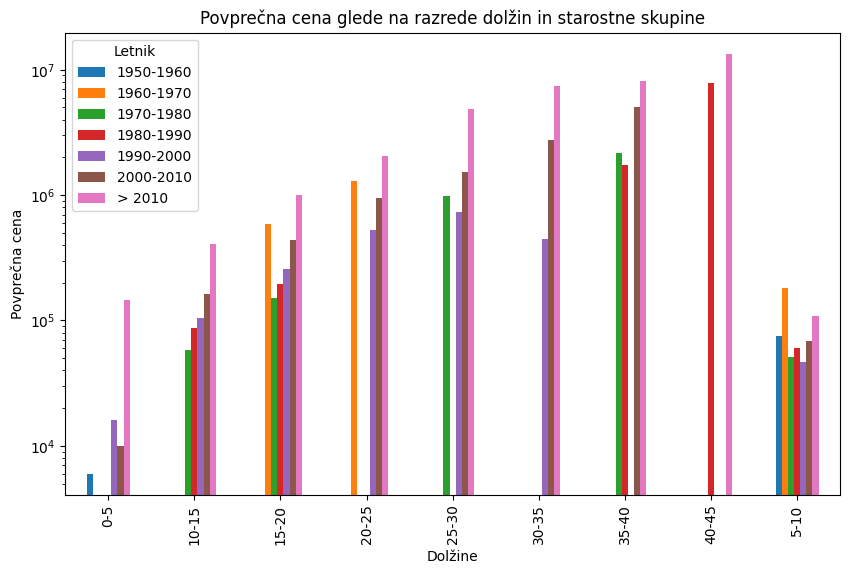

In [140]:
def create_group_label(x):
    group_boundaries = [5 * i for i in range(10)] 
    for i in range(len(group_boundaries) - 1):
        if group_boundaries[i] <= x <= group_boundaries[i + 1]:
            return f"{group_boundaries[i]}-{group_boundaries[i + 1]}"
    return "Other"

barke2["group_1"] = barke2.dolzina.apply(create_group_label)

def categorize_year(year):
    if  year < 1940:
        return "< 1940"
    elif 1940 <= year < 1950:
        return "1940-1950"
    elif 1950 <= year < 1960:
        return "1950-1960"
    elif 1960 <= year < 1970:
        return "1960-1970"
    elif 1970 <= year < 1980:
        return "1970-1980"
    elif 1980 <= year < 1990:
        return "1980-1990"
    elif 1990 <= year < 2000:
        return "1990-2000"
    elif 2000 <= year < 2010:
        return "2000-2010"
    elif 2010 <= year:
        return "> 2010"
    else:
        return "Other"
    

barke2["letnik"] = barke2.letnik.astype(int)
barke2["group_2"] = barke2.letnik.apply(categorize_year)

df_2 = barke2.groupby(["group_1", "group_2"])
df_2 = df_2.cena.mean().reset_index() 
df_2 = df_2.sort_values(by=["group_1", "group_2"]) 

df_2_pivot = df_2.pivot(index="group_1", columns="group_2", values="cena")
df_2_pivot.plot(
    title="Povprečna cena glede na razrede dolžin in starostne skupine",
    xlabel="Dolžine",
    ylabel="Povprečna cena",
    kind="bar", 
    logy=True, 
    figsize=(10, 6)
)
plt.legend(title="Letnik")

Zgornji graf nam prikazuje, kako se spreminja povprečna cena bark po različnih dolžinah in starostih, na y-osi sem uporabil logaritemsko skalo, da je lažje odčitati povprečne cene. Pri večini razredih dolžin cena pada s starostjo barke, s kakšno izjemo. Zanimivo je, da pri barkah dolžine 5-10m temu ni tako, povprečne cene so dokaj podobne, izstopajo pa barke izdelane med leti 1960-1970. Razlog za to je lahko, da je za barke iz tistega obdobja malo oglasov in so le te zelo dobro ohranjene ter je zato cena višja. Toda če pogledamo tudi pri drugih dolžinah barke iz tega obdobja ohrnjajo zelo visoko ceno, torej lahko sklepamo da so barke tega obdobja zelo cenjene.

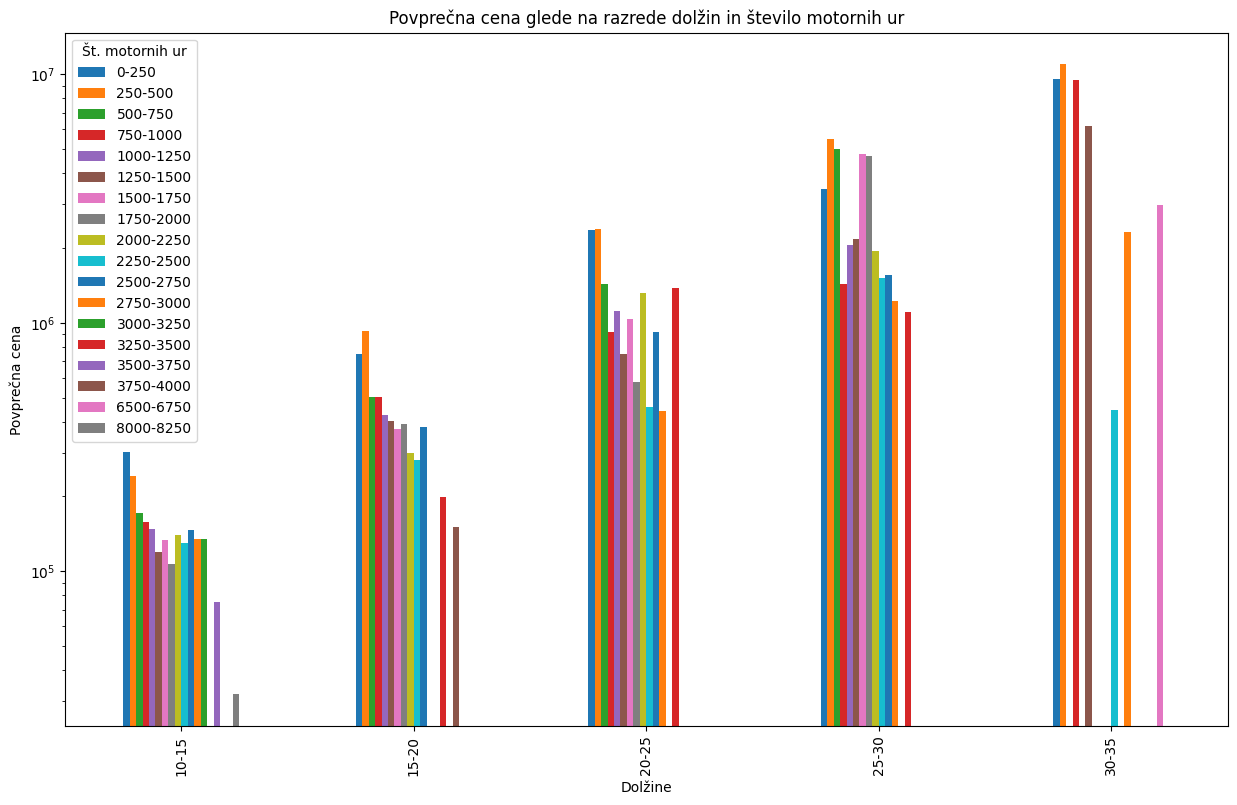

In [141]:
barke3 = pd.read_csv("podatki_bark.csv", index_col="id")

barke3 = barke3.dropna(subset=["dolzina", "st_ur", "cena"])
barke3 = barke3.reset_index(drop=True)
columns_to_drop = ["ime_barke", "tip_barke", "sirina", "st_kabin", "letnik", "drzava"]
barke3.drop(columns=columns_to_drop, inplace=True)
barke3 = barke3[(barke3.dolzina > 10) & (barke3.dolzina <= 35)]

barke3["floor_dolzine"] = np.floor(barke3["dolzina"])
barke3["range_dolzine"] = barke3.apply(lambda row: f"{int(row['floor_dolzine'])} - {int(row['floor_dolzine']) + 1}", axis=1)

df3 = barke3.groupby("range_dolzine").cena.mean().reset_index()
df3.columns = ["range_dolzine", "mean_cena"]
barke3 = barke3.sort_values(by="range_dolzine")

def create_group_label(x):
    group_boundaries = [5 * i for i in range(11)] 
    for i in range(len(group_boundaries) - 1):
        if group_boundaries[i] <= x <= group_boundaries[i + 1]:
            return f"{group_boundaries[i]}-{group_boundaries[i + 1]}"
    return "Other"

barke3["group_1"] = barke3.dolzina.apply(create_group_label)

def categorize_st_ur(st_ur):
    zaokrozeno = round(st_ur / 250.0) * 250.0
    if st_ur - zaokrozeno >= 0:
        return f"{int(zaokrozeno)}-{int(zaokrozeno) + 250}"
    else:
        return f"{int(zaokrozeno) - 250}-{int(zaokrozeno)}"

barke3["st_ur"] = barke3.st_ur.astype(int)
barke3["group_2"] = barke3.st_ur.apply(categorize_st_ur)

df_3 = barke3.groupby(["group_1", "group_2"])
df_3 = df_3.cena.mean().reset_index() 
df_3 = df_3.sort_values(by=["group_1", "group_2"])

df_3_pivot = pd.pivot_table(df_3, values="cena", index="group_1", columns="group_2")
df_3_pivot = df_3_pivot.reindex([f"{i * 250}-{(i+1) * 250}" for i in range(16)] + ["6500-6750", "8000-8250"], axis=1)
df_3_pivot.plot(
    title="Povprečna cena glede na razrede dolžin in število motornih ur",
    xlabel="Dolžine",
    ylabel="Povprečna cena",
    kind="bar", 
    logy=True, 
    figsize=(15, 9)
)
plt.legend(title="Št. motornih ur")

Zgornji graf nam prikazuje, kako se spreminja povprečna cena barke po razredih dolžin glede na število motornih ur (koliko ur je motor deloval). Dolžine sem omejil, ker je bilo pri ostalih res malo podatkov. Pričakovano vidimo, da z večanjem števila ur cena vpada. Vmes je par izjem, kar je verjetno posledica premalo oglasov na določeno skupino ur da bi dobili pravo povpečje, torej je kakšna barka zelo dobro ohranjena kljub večjemu številu ur, zato ima višjo ceno ter je posledično zviša povprečje.